# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem, it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

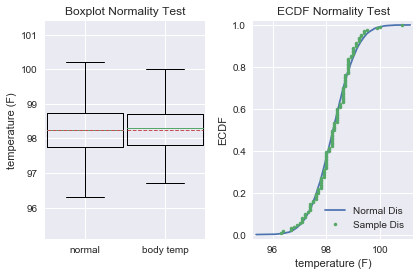

Human Body Temperture median and 2.5 percentile difference is 1.5775000000000006
Human Body Temperture median and 97.5 percentile difference is 1.177500000000009
Distribution is normal.


In [40]:
# Your work here.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

#Create normal data based on sample mean and std
np.random.seed(42)
norm_data = np.random.normal(mean, std, 10000)

# x and y values for the normal data and the sample data
x_nd, y_nd = ecdf(norm_data)
x_hbt, y_hbt = ecdf(df['temperature'])

sns.set()

plt.subplot(1,2,1)
plt.boxplot([x_nd, x_hbt], labels=['normal', 'body temp'], widths=0.95, showmeans=True, meanline=True)
plt.ylabel('temperature (F)')
plt.title('Boxplot Normality Test')


plt.subplot(1,2,2)
#plot ecdf of normal data and sample data
plt.plot(x_nd, y_nd)
plt.plot(x_hbt, y_hbt, marker='.', linestyle='none')

#Label axis
plt.xlabel('temperature (F)')
plt.ylabel('ECDF')
plt.title('ECDF Normality Test')
plt.legend(('Normal Dis', 'Sample Dis'), loc='lower right')
#Set margin
plt.margins(0.02)
plt.tight_layout()

#Show 
plt.show()

#Percentile
p = [2.5, 50, 97.5]

print('Human Body Temperture median and', p[0], 'percentile difference is', np.percentile(x_hbt, p)[1] -np.percentile(x_hbt, p)[0])
print('Human Body Temperture median and', p[2], 'percentile difference is', np.percentile(x_hbt, p)[2] -np.percentile(x_hbt, p)[1])

#measure of normality
k, p_val = stats.normaltest(df.temperature)
if p_val < 0.05:
    print('Distribution is not normal.')
else:
    print('Distribution is normal.')

### 1. Is the distribution of body temperatures normal?

The 2.5 and 97.5 percentile to median differences, 1.58 and 1.18 respectively, indicates an uneven spread of the data about the median however close distribution. The boxplot compares the normal ditribution and the human body temperature data set and it can be seen that the median is higher than the mean which is an indication of an offset distribution. The ECDF shows the data points are above or below the theoretical normal curve. Therefore the data is close to <b>normal</b>.

### 2. Is the sample size large? Are the observations independent?

In [5]:
print('There are', len(df.temperature), 'observations.')

There are 130 observations.


The sample size of 30 or more satisfies the rule of thumb for the central limit theorem. In terms of independence there is one of two conditons to be considered independent; sample is less than 10% of the population and sampling with replacement. The assumption is that the population is greater than 1300 and therefore the observations are <b>independent</b>.

### 3. Is the true population mean really 98.6 degrees F?

#### a. First, try a bootstrap hypothesis test.

Hypothesis <br>
H<sub>O</sub>: mu = 98.6$^{\circ}$F <br>
H<sub>A</sub>: mu != 98.6$^{\circ}$F

In [6]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for a in range(size)])

translated_hbt = df.temperature - np.mean(df.temperature) + 98.6

bs_replicates = draw_bs_reps(translated_hbt, np.mean, 10000)

p_value = np.sum(bs_replicates <= np.mean(df.temperature))/len(bs_replicates)

print('The p-value is', p_value)

The p-value is 0.0


A p-value of 0.0 is an indication that there should be a failure to accept the null (H<sub>O</sub>: mu = 98.6$^{\circ}$F) in favor of the alternative hypothesis (H<sub>A</sub>: mu != 98.6$^{\circ}$F).

#### b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

The problem provided the mean of the population (98.6$^{\circ}$F) and we can determine the descriptive statistics from the sample data, therefore a <b>one-sample t-test statistic</b> is suited for this analysis since there's no comparison between groups. The t-statistic is preferred over the z-statistic since the population standard deviation is unknown. Even if we are to use the sample's standard deviation.

#### c. In this situation, is it appropriate to use the  t-test  or  z-test  statistic?

In [11]:
#Using t-statistic
pop_mean = 98.6

t, p = stats.ttest_1samp(df.temperature, pop_mean)
print('The t-value is', t, 'and the p-value is', p)

The t-value is -5.4548232923645195 and the p-value is 2.4106320415561276e-07


In [19]:
#Using z-statistic
sam_mean = np.mean(df.temperature)
z = (sam_mean - pop_mean) / (np.std(df.temperature)/np.sqrt(len(df.temperature)))
z_p = stats.norm.sf(abs(z))*2
print('The zscore is', z, 'and the p-value is', z_p)

The zscore is -5.475925202078116 and the p-value is 4.3523151658821886e-08


#### d. Now try using the other test. How is the result be different? Why?

Both test result in similar standardized values, however a t-test prevent underestimation of the p-value and therefore it will be larger.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

#### a. Which one is the correct one to use?
#### b. What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [13]:
sub_samp = np.random.choice(df.temperature, 10)

sub_t, sub_p = stats.ttest_1samp(sub_samp, pop_mean)
print('The t-value is', sub_t, 'and the p-value is', sub_p)


The t-value is -1.3605380662763995 and the p-value is 0.20675496612082248


In [14]:
sub_z = (np.mean(sub_samp) - pop_mean) / (np.std(sub_samp)/np.sqrt(len(sub_samp)))
sub_z_p = stats.norm.sf(abs(sub_z))*2

print('The z-value is', sub_z, 'and the p-value is', sub_z_p)

The z-value is -1.4341330442648481 and the p-value is 0.1515342996549623


Both values are close, the p-values obtained from the z-statistic is great than that for the t-statistic. However the conditions for choosing the appropriate method must be observed. For the first determinaterminant is that there's no information about the population standard deviation and for the second the sample size is <30. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [21]:
#Margin of error at 99% confidence
n = len(df.temperature)
m = stats.t.ppf((1 + 0.99) / 2, n - 1)

ci = (sam_mean - m, sam_mean + m)
print('With 99% confidence the interval is', ci)

With 99% confidence the interval is (95.63475208953099, 100.86370944893056)


In order for someone's temperature to be considered "abnormal" their temperature should be below 95.6$^{\circ}$F or above 100.9$^{\circ}$F 

### 6. Is there a significant difference between males and females in normal temperature?

In [31]:
#Separate the temperatures by gender
f_data = df[df.gender == 'F']
m_data = df[df.gender == 'M']

In [41]:
#Means by gender
f_t_mean = np.mean(f_data.temperature)
m_t_mean = np.mean(m_data.temperature)
print('Female mean body temperature is', f_t_mean)
print('Male mean body temperature is',m_t_mean)

Female mean body temperature is 98.39384615384613
Male mean body temperature is 98.1046153846154


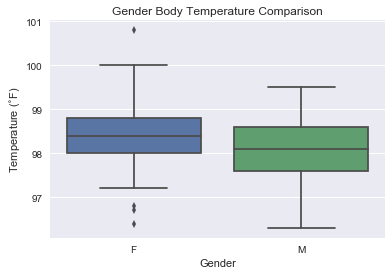

In [38]:
sns.boxplot(x='gender', y='temperature', data=df)
plt.xlabel('Gender')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.title('Gender Body Temperature Comparison')
plt.show()

#### a. What testing approach did you use and why?


A boxplot of the temperature by gender visually indicates that there's more spread for females, the females mean body temperature is higher than males. A two-sample t-test statistic will be used to test if there's significant body temperature differnce between the genders

#### b. Write a story with your conclusion in the context of the original problem.

Hypothesis <br>
H<sub>O</sub>: There's no significant difference <br>
H<sub>A</sub>: There's a significant difference

In [43]:
#Two sample t-test
diff_t, diff_p = stats.ttest_ind(f_data.temperature, m_data.temperature)
print("t-statistic:", diff_t)
print("p-value:", diff_p)

t-statistic: 2.2854345381656103
p-value: 0.02393188312239561


The p-value (0.024) obtained for the two-sample t-test is less than 0.05 (significance level, 95% confidence). Therefore with 95% confidence the null hypothesis can be rejected, there's a significant difference between the body temperatures of males and females. 